In [1]:
# Basic module
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

-----------------
#### ■データの読み込み
------------------

In [2]:
train = pd.read_csv('../1. data/train.csv')
test = pd.read_csv('../1. data/test.csv')

In [3]:
# 確認
train.head(1)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,23.059782,6,140,110,2815,17.977429,80,1,dodge aspen


In [4]:
# 統計情報確認
train.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,500.176000,27.010940,5.192000,194.762000,2719.71400,15.300328,76.332000,1.420000
std,288.657179,7.356249,1.617519,106.277425,717.03541,2.261096,3.909007,0.759443
min,0.000000,15.787613,4.000000,79.000000,1755.00000,9.530859,70.000000,1.000000
25%,242.250000,22.396641,4.000000,104.000000,2178.75000,13.441562,73.000000,1.000000
50%,513.000000,26.228984,4.000000,140.000000,2615.00000,15.231923,76.000000,1.000000
75%,750.250000,35.088333,6.000000,302.000000,3193.00000,17.190531,80.000000,2.000000
max,997.000000,44.763897,8.000000,429.000000,4732.00000,21.922511,82.000000,3.000000


------------

In [5]:
# Min-Max-scale関数
def min_max_scale(train, test):
    """学習データの値で標準化(Min-Max-Scale)を行う関数
    
    Parameter:
    -----------------------------------
    train: ndarray
    test: ndarray
    
    Return:
    -----------------------------------
    ndarray
    """
    tr_max = np.max(train)
    tr_min = np.min(train)
    
    scaled = (test - tr_min) / (tr_max - tr_min)
    
    return scaled

# Standard normalization
# 標準化関数
def stdsc(train, test):
    """学習データの値で標準化を行う関数
    
    Parameter:
    -----------------------------------
    train: ndarray
    test: ndarray
    
    Return:
    -----------------------------------
    ndarray
    """
    mean = np.mean(train)
    std = np.std(train)
    
    stdscaled = (test - mean) / std
    
    return stdscaled

##### ■ 目的変数 mpgの標準化

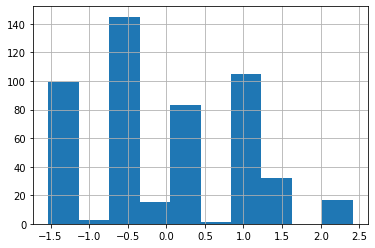

In [6]:
train['mpg_std'] = stdsc(train['mpg'], train['mpg'])
train['mpg_std'].hist()

In [7]:
true_mpg = np.std(train)

##### ■ Cylinders列の処理

In [8]:
# float変換
train['cylinders'] = train['cylinders'].astype('float')
test['cylinders'] = test['cylinders'].astype('float')

train['cylinders_std'] = stdsc(train['cylinders'].values, train['cylinders'].values)
test['cylinders_std'] = stdsc(train['cylinders'].values, test['cylinders'].values)
# 確認
print('最大値:', np.max(train['cylinders_std'].values))
print('最小値:', np.min(train['cylinders_std'].values))

最大値: 1.7377302337682023
最小値: -0.7376689596337954


##### ■ displacement

In [9]:
train['displacement_std'] = stdsc(train['displacement'].values, train['displacement'].values)
test['displacement_std'] = stdsc(train['displacement'].values, test['displacement'].values)
# 確認
print('平均:', np.mean(train['displacement_std'].values))
print('分散:', np.var(train['displacement_std'].values))

平均: -1.0658141036401503e-17
分散: 1.0000000000000002


##### ■ horsepower

In [10]:
# ?のindex取得
drop_idx = []
for idx, value in enumerate(train['horsepower']):
    if not value.isnumeric():
        drop_idx.append(idx)
        print(idx, value)
# 欠損値はdrop
train = train.drop(drop_idx)
train['horsepower'] = train['horsepower'].astype('float')

10 ?
48 ?
224 ?
286 ?
320 ?
407 ?
415 ?
455 ?
487 ?


In [11]:
# 欠損値?を処理
# ?以外を取得
values_df = test[test['horsepower'] != '?']['horsepower']
values_float = values_df.astype('float64')

# 平均値で補完
test.loc[test['horsepower']=='?','horsepower'] = values_float.mean()

# Dataframeをfloatに変換
test['horsepower'] = test['horsepower'].astype('float64')

In [12]:
# Stamdard normalization
train['horsepower_std'] = stdsc(train['horsepower'].values, train['horsepower'].values)
test['horsepower_std'] = stdsc(train['horsepower'].values, test['horsepower'].values)
# 確認
print('平均:', np.mean(train['horsepower_std'].values))
print('分散:', np.var(train['horsepower_std'].values))

平均: 1.917452392835301e-16
分散: 1.0


##### ■ weight

In [13]:
# 標準化
train['weight_std'] = stdsc(train['weight'].values, train['weight'].values)
test['weight_std'] = stdsc(train['weight'].values, test['weight'].values)
# 確認
print('平均:', np.mean(train['weight_std'].values))
print('分散:', np.var(train['weight_std'].values))

平均: -1.3024204932466195e-16
分散: 1.0


##### ■ Acceleration

In [14]:
# 標準化
train['acceleration_std'] = stdsc(train['acceleration'].values, train['acceleration'].values)
test['acceleration_std'] = stdsc(train['acceleration'].values, test['acceleration'].values)
# 確認
print('平均:', np.mean(train['acceleration_std'].values))
print('分散:', np.var(train['acceleration_std'].values))

平均: -4.3775799911900266e-16
分散: 0.9999999999999999


##### ■ Model Year

In [15]:
# One-hot-encoding
train = pd.get_dummies(train, columns=['model year'])
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car name,mpg_std,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,0,23.059782,6.0,140,110.0,2815,17.977429,1,dodge aspen,-0.537654,...,0,0,0,0,0,0,0,1,0,0
1,3,17.674521,8.0,350,150.0,4456,13.514535,1,dodge rampage,-1.270453,...,0,0,0,0,0,0,0,0,0,0
2,4,17.136353,8.0,302,140.0,2774,13.209912,1,mercury cougar brougham,-1.343684,...,0,0,0,0,0,0,1,0,0,0
3,7,22.664666,6.0,400,85.0,2190,15.196381,1,pontiac j2000 se hatchback,-0.591419,...,0,0,0,0,0,0,0,0,0,0
4,9,17.872018,8.0,429,220.0,2245,9.621400,1,ford galaxie 500,-1.243579,...,0,0,0,0,0,0,0,0,0,0


In [16]:
len(train.columns)

28

In [17]:
# One-hot-encoding
test = pd.get_dummies(test, columns=['model year'])
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,origin,car name,cylinders_std,displacement_std,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,1,4.0,98,67.0,2000,15.049795,1,peugeot 504,-0.737669,-0.911378,...,0,0,0,0,0,0,0,0,1,0
1,2,4.0,97,90.0,2720,15.339172,1,dodge aspen,-0.737669,-0.920797,...,0,0,0,0,0,0,1,0,0,0
2,5,4.0,90,75.0,2807,17.821599,1,dodge monaco brougham,-0.737669,-0.986728,...,0,0,0,0,1,0,0,0,0,0
3,6,4.0,140,110.0,2807,13.780354,2,buick century limited,-0.737669,-0.515790,...,0,0,0,0,0,0,0,0,0,1
4,8,4.0,121,85.0,3070,13.688921,2,saab 99le,-0.737669,-0.694747,...,1,0,0,0,0,0,0,0,0,0


##### ■ origin列

In [18]:
# Min-Max-scale
train['origin_std'] = stdsc(train['origin'].values,train['origin'].values)
test['origin_std'] = stdsc(train['origin'].values,test['origin'].values)
# 確認
print('最大値:', np.max(train['cylinders_std'].values))
print('最小値:', np.min(train['cylinders_std'].values))

最大値: 1.7377302337682023
最小値: -0.7376689596337954


##### ■ car name

In [19]:
# メーカのkey-valueaリスト作成
Maker_dict = {
    'ford': 'ford',
    'mercury': 'ford',
    'capri': 'ford',
    'dodge': 'dodge',
    'volkswagen': 'volkswagen',
    'vw': 'volkswagen',
    'datsun': 'datsun',
    'honda': 'honda',
    'toyota': 'toyota',
    'amc': 'amc',
    'plymouth': 'plymouth',
    'pontiac': 'gm',
    'buick': 'gm',
    'peugeot': 'peugeot',
    'others': 'others'
}

In [20]:
# car nameからメーカーを設定
new_name_train = []
for car_name in train['car name']:
    for maker_name in Maker_dict.keys():
        if maker_name == 'others':
            new_name_train.append(Maker_dict[maker_name])
        if maker_name in car_name:
            new_name_train.append(Maker_dict[maker_name])
            break # 見つかったらループ抜ける

train['maker'] = new_name_train

new_name_test = []
for car_name in test['car name']:
    for maker_name in Maker_dict.keys():
        if maker_name == 'others':
            new_name_test.append(Maker_dict[maker_name])
        if maker_name in car_name:
            new_name_test.append(Maker_dict[maker_name])
            break # 見つかったらループ抜ける

test['maker'] = new_name_test

In [21]:
# one-hot-encoding
train = pd.get_dummies(train, columns=['maker'])
train.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,car name,mpg_std,...,maker_datsun,maker_dodge,maker_ford,maker_gm,maker_honda,maker_others,maker_peugeot,maker_plymouth,maker_toyota,maker_volkswagen
0,0,23.059782,6.0,140,110.0,2815,17.977429,1,dodge aspen,-0.537654,...,0,1,0,0,0,0,0,0,0,0
1,3,17.674521,8.0,350,150.0,4456,13.514535,1,dodge rampage,-1.270453,...,0,1,0,0,0,0,0,0,0,0
2,4,17.136353,8.0,302,140.0,2774,13.209912,1,mercury cougar brougham,-1.343684,...,0,0,1,0,0,0,0,0,0,0
3,7,22.664666,6.0,400,85.0,2190,15.196381,1,pontiac j2000 se hatchback,-0.591419,...,0,0,0,1,0,0,0,0,0,0
4,9,17.872018,8.0,429,220.0,2245,9.621400,1,ford galaxie 500,-1.243579,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# one-hot-encoding
test = pd.get_dummies(test, columns=['maker'])
test.head()

,id,cylinders,displacement,horsepower,weight,acceleration,origin,car name,cylinders_std,displacement_std,...,maker_datsun,maker_dodge,maker_ford,maker_gm,maker_honda,maker_others,maker_peugeot,maker_plymouth,maker_toyota,maker_volkswagen
0,1,4.0,98,67.0,2000,15.049795,1,peugeot 504,-0.737669,-0.911378,...,0,0,0,0,0,0,1,0,0,0
1,2,4.0,97,90.0,2720,15.339172,1,dodge aspen,-0.737669,-0.920797,...,0,1,0,0,0,0,0,0,0,0
2,5,4.0,90,75.0,2807,17.821599,1,dodge monaco brougham,-0.737669,-0.986728,...,0,1,0,0,0,0,0,0,0,0
3,6,4.0,140,110.0,2807,13.780354,2,buick century limited,-0.737669,-0.515790,...,0,0,0,1,0,0,0,0,0,0
4,8,4.0,121,85.0,3070,13.688921,2,saab 99le,-0.737669,-0.694747,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# カラム名表示
train.columns

Index(['id', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin', 'car name', 'mpg_std', 'cylinders_std',
       'displacement_std', 'horsepower_std', 'weight_std', 'acceleration_std',
       'model year_70', 'model year_71', 'model year_72', 'model year_73',
       'model year_74', 'model year_75', 'model year_76', 'model year_77',
       'model year_78', 'model year_79', 'model year_80', 'model year_81',
       'model year_82', 'origin_std', 'maker_amc', 'maker_datsun',
       'maker_dodge', 'maker_ford', 'maker_gm', 'maker_honda', 'maker_others',
       'maker_peugeot', 'maker_plymouth', 'maker_toyota', 'maker_volkswagen'],
      dtype='object')

In [24]:
# カラム名表示
test.columns

Index(['id', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin', 'car name', 'cylinders_std',
       'displacement_std', 'horsepower_std', 'weight_std', 'acceleration_std',
       'model year_70', 'model year_71', 'model year_72', 'model year_73',
       'model year_74', 'model year_75', 'model year_76', 'model year_77',
       'model year_78', 'model year_79', 'model year_80', 'model year_81',
       'model year_82', 'origin_std', 'maker_amc', 'maker_datsun',
       'maker_dodge', 'maker_ford', 'maker_gm', 'maker_honda', 'maker_others',
       'maker_peugeot', 'maker_plymouth', 'maker_toyota', 'maker_volkswagen'],
      dtype='object')

In [25]:
# 不要な列リスト
# 残す列をコメントアウト
drop_columns = [
        'id', 
#         'mpg', 
        'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'origin', 'car name', 
#         'cylinders_std', 'displacement_std', 'horsepower_std', 'weight_std', 'acceleration_std',
#         'model year_70', 'model year_71', 'model year_72', 'model year_73',
#         'model year_74', 'model year_75', 'model year_76', 'model year_77',
#         'model year_78', 'model year_79', 'model year_80', 'model year_81',
#         'model year_82', 'origin_std', 
        'maker_amc', 'maker_datsun',
        'maker_dodge', 'maker_ford', 'maker_gm', 'maker_honda', 'maker_others',
        'maker_peugeot', 'maker_plymouth', 'maker_toyota', 'maker_volkswagen'
]

In [26]:
# # pkl形式で保存
# data = train.drop(drop_columns, axis=1)
# file_name = '../1. data/train_pre_proccessing_v2.pkl'
# with open(file_name, 'wb') as fp:
#     pickle.dump(data, fp)

# data = test.drop(drop_columns, axis=1)
# file_name = '../1. data/test_pre_proccessing_v2.pkl'
# with open(file_name, 'wb') as fp:
#     pickle.dump(data, fp)

In [27]:
# pkl形式で保存
data = train.drop(drop_columns, axis=1)
file_name = '../1. data/train_pre_proccessing_v3.pkl'
with open(file_name, 'wb') as fp:
    pickle.dump(data, fp)

data = test.drop(drop_columns, axis=1)
file_name = '../1. data/test_pre_proccessing_v3.pkl'
with open(file_name, 'wb') as fp:
    pickle.dump(data, fp)

In [28]:
data

,cylinders_std,displacement_std,horsepower_std,weight_std,acceleration_std,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_std
0,-0.737669,-0.911378,-1.120391,-1.034688,-0.080506,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.552651
1,-0.737669,-0.920797,-0.473664,-0.023210,0.050548,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.552651
2,-0.737669,-0.986728,-0.895442,0.099010,1.174798,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.552651
3,-0.737669,-0.515790,0.088708,0.099010,-0.655414,0,0,0,0,0,0,0,0,0,0,0,0,1,0.758226
4,-0.737669,-0.694747,-0.614257,0.468481,-0.696823,0,0,0,1,0,0,0,0,0,0,0,0,0,0.758226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.737669,0.284804,-0.051885,1.592345,0.067367,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.552651
496,-0.737669,-0.515790,0.144945,-0.023210,-0.729466,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.552651
497,1.737730,1.160749,0.088708,0.052651,-0.885352,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.552651
498,-0.737669,-0.986728,-0.895442,0.099010,1.161646,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.552651
